In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import utils

In [3]:
# which tags we'll keep for each task
KEEP_TAGS = {
    "POS": ["NOUN", "ADJ", "VERB", "PRON", "DET", "NUM", "ADV", "AUX"],
    "DEP": ["PUNCT", "NSUBJ", "OBJ", "OBL", "ADVCL", "CASE", "DET", "AMOD"],
}

In [4]:
# plotting config
sns.set_style("white")
sns.set_context("paper")
# in inches
TEXTWIDTH = 6.30045

# Roberta Base

Here we plot filtered cross-neutralization for the DEP and POS tasks on the en_gum dataset using embeddings from Roberta Base.

In [5]:
# determining best probing layer and aggregation function
pos_experiments_df = utils.get_experiments_df(
    "POS", "en_gum", "roberta-base", "lightning_logs"
)
pos_mode = pos_experiments_df.index[0]
dep_experiments_df = utils.get_experiments_df(
    "DEP", "en_gum", "roberta-base", "lightning_logs"
)
dep_mode = dep_experiments_df.index[0]

In [6]:
# computing accuracy drop due to neutralisation
pos_eval_path = f"lightning_logs/roberta-base/en_gum/POS/{pos_mode}/evaluation"
pos_acc_drop = utils.get_acc_drop(pos_eval_path, KEEP_TAGS["POS"])

dep_eval_path = f"lightning_logs/roberta-base/en_gum/DEP/{dep_mode}/evaluation"
dep_acc_drop = utils.get_acc_drop(dep_eval_path, KEEP_TAGS["DEP"])

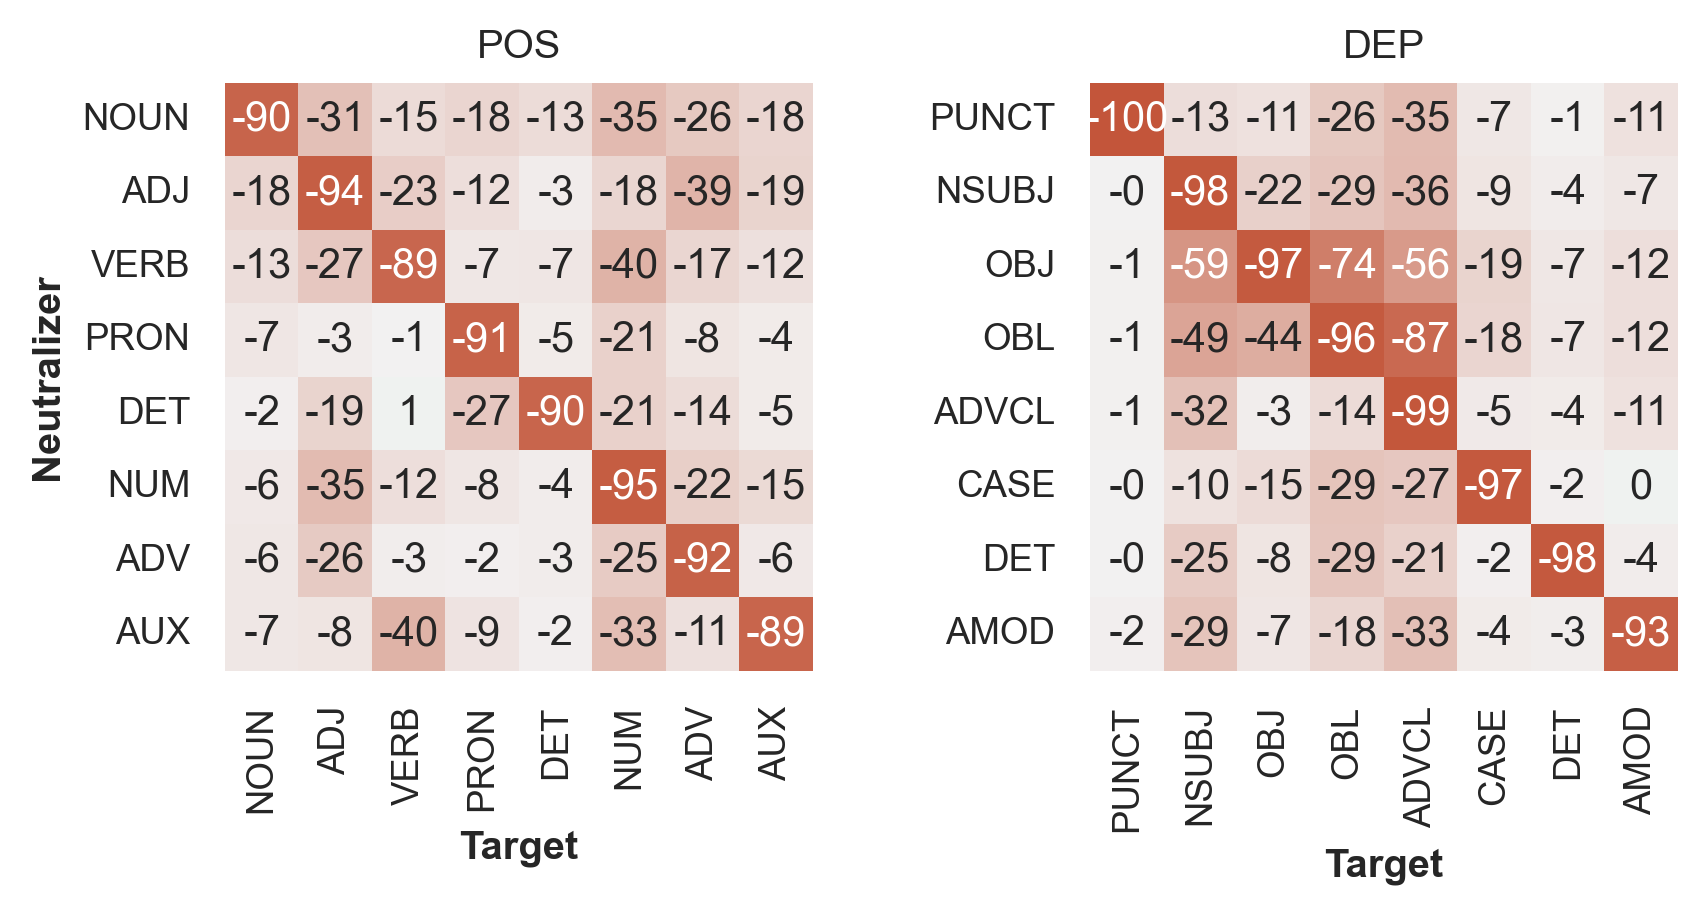

In [7]:
# plot
cmap = sns.diverging_palette(20, 145, as_cmap=True)

label_dict = {"weight": "bold"}

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(TEXTWIDTH, TEXTWIDTH / 2), dpi=300)
ax1 = sns.heatmap(
    pos_acc_drop * 100,
    annot=True,
    fmt=".0f",
    cmap=cmap,
    cbar=False,
    ax=ax1,
    vmin=-100,
    vmax=100,
    center=0,
    square=True,
)
ax1.set_xlabel(ax1.get_xlabel(), fontdict=label_dict)
ax1.set_ylabel(ax1.get_ylabel(), fontdict=label_dict)
ax1.set_title("POS")
ax2 = sns.heatmap(
    dep_acc_drop * 100,
    annot=True,
    fmt=".0f",
    cmap=cmap,
    cbar=False,
    ax=ax2,
    vmin=-100,
    vmax=100,
    center=0,
    square=True,
)
ax2.set_xlabel(ax2.get_xlabel(), fontdict=label_dict)
ax2.set_ylabel("")
ax2.set_title("DEP")
f.set_tight_layout(True)
# save our figure
plt.savefig("roberta-base_multifigure_sampled.eps", bbox_inches="tight")
plt.show()